# Metric #2: Walkability - Ozzie Perkins

Exercise is important for dogs, but we don't want them wandering into the street. I found a dataset that surveyed the length of sidewalks in the area and compared it to the length of streets. They dubbed this the "walkability" of the area. In order to find the most dog friendly neighborhood, I want to determine the most "walkable" one.

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline

/opt/tljh/user/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


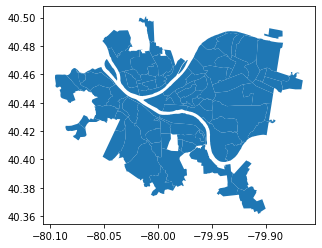

In [66]:
indata = pd.read_csv('sidewalkstreetratioupload.csv')
#for my purposes, I don't need to know the street or sidewalk size specifically
dataframe = pd.DataFrame(indata, columns = ["GEOID", "Ratio"])
#I don't want rows without any data
dataframe = dataframe[dataframe['Ratio'] != '']
dta_clean = dataframe[dataframe['Ratio'] > 0]

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
#1310 is the only row that doesn't contain a GEOID so I'm excluding it
neighborhoods = neighborhoods[neighborhoods['objectid'] != 1310]
neighborhoods.plot()

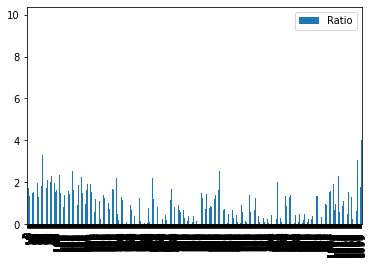

In [67]:
#for plotting we don't need the tract since each row is unique
justRatio = dta_clean.drop('GEOID', 1)
#make sure our value is in float
justRatio['Ratio'] = justRatio['Ratio'].astype(float)
justRatio.plot.bar()

Now we're getting somewhere. Just not quite readable. Let's sort them and take the top 10.

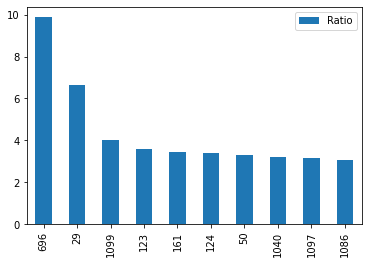

In [4]:
justRatio.sort_values(by='Ratio', ascending=False).iloc[0:10].plot.bar()

Those are the values we are expecting for the top 10, but we don't know which neighorhoods they are or where they are, so let's go back to geopandas and our neighborhoods. 

In [2]:
neighborhoods['geoid10'] = neighborhoods['geoid10'].astype(int)
ratio_map = neighborhoods.merge(data_cln, how='left', left_on='geoid10', right_on='GEOID')

NameError: name 'neighborhoods' is not defined

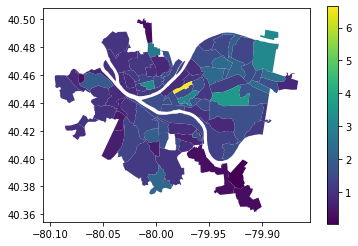

In [70]:
#See if our map works
ratio_map.plot(column="Ratio", legend=True)

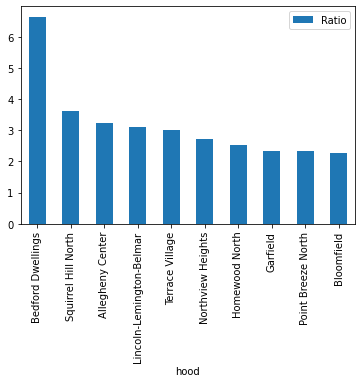

In [73]:
#Now we can make some modifications to our chart from before
hoods = ratio_map[["Ratio", "hood"]]
top = hoods.sort_values(by='Ratio', ascending=False).iloc[0:10]
top.plot(x = "hood", y = "Ratio", kind = 'bar')

Here we can see Bedford Dwellings has a clear advantage in terms of walkability with some close contenders afterwards. 